---
title: "The Floyd-Warshall Algorithm"
author: Deepam Minda
date: "August 25, 2024"
categories: [graphs]
format:
  html:
    toc: true
    toc-depth: 3
    html-math-method: katex
    code-fold: false
  ipynb: default
execute:
  warning: false
---


Lets have a quick look at a basic graph algorithm today:

**Given a weighted graph, finding the shortest path between all pairs of nodes.**


In [163]:
# lets define a graph

# Show the edges matrix (assume A-F as indices 0-6 in the matrix)
labels = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F'}

edges_matrix = [[0, 1, 1, 0, 0, 0],
               [1, 0, 0, 1, 1, 0],
               [1, 0, 0, 1, 0, 1],
               [0, 1, 0, 0, 0, 0],
               [0, 1, 0, 0, 0, 1],
               [0, 0, 1, 0, 1, 0]]

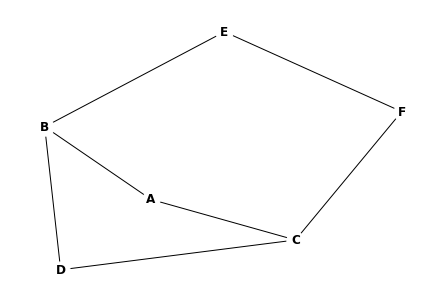

In [164]:
#|code-fold: true
import networkx as nx
import matplotlib.pyplot as plt

# Convert the graph dictionary to a NetworkX graph
nx_graph = nx.Graph()
for i in range(len(edges_matrix)):
    for j in range(len(edges_matrix[i])):
        if edges_matrix[i][j] == 1:
            nx_graph.add_edge(i, j)



# Draw the graph with white nodes
nx.draw(nx_graph, with_labels=True, labels=labels, font_weight='bold', node_color='white')
plt.show()

Lets code the algotrihm

To begin with, we'll have a distances matrix with same shape as edge matrix. Each value there represents the distance bw its row_num(i) and col_num(j). {aka its weights!}
If no edge, distance is $\infty$

We'll also print the distance matrix as a dataframe to visualize its node labels.

In [165]:
import math 
inf = math.inf


print_grid = lambda x: print(pd.DataFrame(distances, index=labels.values(), columns=labels.values()))

enum = {1:1, 0:inf}
distances = [row[:] for row in edges_matrix]
size = len(edges_matrix)

for i in range(size):
    for j in range(size):
        distances[i][j] = enum[distances[i][j]]

print_grid(distances)

     A    B    C    D    E    F
A  inf  1.0  1.0  inf  inf  inf
B  1.0  inf  inf  1.0  1.0  inf
C  1.0  inf  inf  1.0  inf  1.0
D  inf  1.0  inf  inf  inf  inf
E  inf  1.0  inf  inf  inf  1.0
F  inf  inf  1.0  inf  1.0  inf


Now we have distance bw nodes $i$ and $j$. Now lets perform another loop for `n` times (n=num_nodes).
in each pass we'll add a new node k into the mix and perform the following operation:

    `distances[i][j] = min(distances[i][j], distances[i][k] + distances[k][j])`

We are essentially saying this, 

At any $k^th$ step, we have $i$ and $j$ and a total of k vertices(k steps) we have 2 choices,

Is the path bw $i$ and $j$ through k vertices shorter than the distance bw $i$ and $j$ through k-1 vertices. 

**ie for any path $i,j$ does adding this node to its path reduce the distance than what we know?** (default is $\infty$ or direct connection!)

Beautiful isn't it. Without the DP this would $j$ust look 1 hop deep into the network for each comparison. 

Now lets watch it in action for the graph we defined.

In [166]:
visited_nodes = []
for k in range(size):
    for i in range(size):
        for j in range(size):
            distances[i][j] = min(distances[i][j], distances[i][k]+distances[k][j])
            
    # Print the distances matrix as a grid after every k
    visited_nodes.append(labels[k])
    print(f"Pass {k+1}: with {visited_nodes}:\n")
    print_grid(distances)
    print("\n=========\n")

Pass 1: with ['A']:

     A    B    C    D    E    F
A  inf  1.0  1.0  inf  inf  inf
B  1.0  2.0  2.0  1.0  1.0  inf
C  1.0  2.0  2.0  1.0  inf  1.0
D  inf  1.0  inf  inf  inf  inf
E  inf  1.0  inf  inf  inf  1.0
F  inf  inf  1.0  inf  1.0  inf


Pass 2: with ['A', 'B']:

     A    B  C    D  E    F
A  2.0  1.0  1  2.0  2  inf
B  1.0  2.0  2  1.0  1  inf
C  1.0  2.0  2  1.0  3  1.0
D  2.0  1.0  3  2.0  2  inf
E  2.0  1.0  3  2.0  2  1.0
F  inf  inf  1  inf  1  inf


Pass 3: with ['A', 'B', 'C']:

   A  B  C  D  E  F
A  2  1  1  2  2  2
B  1  2  2  1  1  3
C  1  2  2  1  3  1
D  2  1  3  2  2  4
E  2  1  3  2  2  1
F  2  3  1  2  1  2


Pass 4: with ['A', 'B', 'C', 'D']:

   A  B  C  D  E  F
A  2  1  1  2  2  2
B  1  2  2  1  1  3
C  1  2  2  1  3  1
D  2  1  3  2  2  4
E  2  1  3  2  2  1
F  2  3  1  2  1  2


Pass 5: with ['A', 'B', 'C', 'D', 'E']:

   A  B  C  D  E  F
A  2  1  1  2  2  2
B  1  2  2  1  1  2
C  1  2  2  1  3  1
D  2  1  3  2  2  3
E  2  1  3  2  2  1
F  2  2  1  2  1 

Lets traverse this evolution of the distance value for nodes $F$ and $D$. 

Let *potential_stops* be the $k-1$ sets we have visited at the start of $k^{th}$.


We can see theres no direct path, so obviously the value is $\infty$ to begin with. Even with *potential_stops*=${A,B}$ we cant get to $D$. so the value after 2 passes is still $\infty$.

When we add $C$, we should get a path, and sure we do! we arrive at the answer directly which is 2 ($F->C->D$).

Why does that happen here?
Its because for all nodes being added to the *potential_stops*, we are checking whether adding $k^{th}$ node improves the shortest path among **any** 2 nodes! Hence at value of $k$, we know that if the shortest path exists in the given set, we have it already!
    

## Time Complexity

$T$: $O(N^3)$, where $N$ is the number of vertices.

Lets assume a baseline of **all-pairs-Dijkstra’s Algorithm**:

- Purpose: Computes the shortest path from a single source to all other vertices in a weighted graph.
- Dijkstra: To find the shortest paths between all pairs of vertices, you can run Dijkstra’s algorithm  times (once for each vertex as the source). The Dijkstra algo bsaically just uses plain BFS to get the shortest paths. 
- Time Complexity: $O(E + N\log N)$ for a single source, ie $O(N(E + N\log N))$ for N nodes

When for dense graohs $E$ approaches $N^2$,  $T$ approaches $O(N^3)$ and hence the algo is similar to FW, 
But when $E<<N^2$, ie sparse graphs:  T->$O(N^2 logN)$ -> $O(N^2)$ 


Dijkstra’s algorithm assumes that all edge weights are non-negative. If your graph has negative weights, Dijkstra’s algorithm can give incorrect results. 

While FW can open up use-cases where negative weights are common, such as in routing algorithms, certain scheduling problems, or in algorithms for finding the transitive closure of a graph.